# Fig 5.10, 5.11

Methionine model

In [1]:
using DifferentialEquations
using ModelingToolkit
using Plots
Plots.default(linewidth=2)

In [2]:
hil(x, k=one(x)) = x / (x + k)
hil(x, k, n) = hil(x^n, k^n)

hil (generic function with 3 methods)

Model

In [3]:
@independent_variables t
@variables AdoMet(t) = 10 AdoHcy(t) = 10 Hcy(t)
@variables v_MATI(t) v_MATIII(t) K_MATIII_m1(t) v_MATIII(t) v_GNMT(t) K_MET_m1(t) v_MET(t) v_D(t)
D = Differential(t)
@parameters begin
    K_AHC = 0.1
    Adenosine = 1
    v_MATI_max = 561
    Met = 48.5
    K_MATI_m = 41
    K_MATI_i = 50
    v_MATIII_max = 22870
    K_MATIII_m2 = 21.1
    v_GNMT_max = 10600
    K_GNMT_m = 4500
    K_GNMT_i = 20
    v_MET_max = 4544
    A_over_K_MET_m2 = 0.1
    alpha_d = 1333
end

eqs = [
    Hcy ~ AdoHcy * K_AHC / Adenosine,
    v_MATI ~ v_MATI_max * hil(Met * hil(K_MATI_i, AdoMet), K_MATI_m),
    K_MATIII_m1 ~ 20000 / (1 + 5.7 * hil(AdoMet, 600)^2),
    v_MATIII ~ v_MATIII_max * hil(Met, K_MATIII_m1 * hil(K_MATIII_m2, Met)),
    v_GNMT ~ v_GNMT_max * hil(AdoMet, K_GNMT_m, 2.3) * hil(K_GNMT_i, AdoHcy),
    K_MET_m1 ~ 10 + 2.5 * AdoHcy,
    v_MET ~ v_MET_max * hil(AdoMet, K_MET_m1) * hil(A_over_K_MET_m2),
    v_D ~ alpha_d * Hcy,
    D(AdoMet) ~ (v_MATI + v_MATIII) - (v_GNMT + v_MET),
    D(AdoHcy) ~ (v_GNMT + v_MET - v_D) * hil(Adenosine, K_AHC),
]

@mtkbuild osys = ODESystem(eqs, t)

Model osys:
Equations (2):
  2 standard: see equations(osys)
Unknowns (2): see unknowns(osys)
  AdoMet(t) [defaults to 10]
  AdoHcy(t) [defaults to 10]
Parameters (14): see parameters(osys)
  v_GNMT_max [defaults to 10600]
  A_over_K_MET_m2 [defaults to 0.1]
  v_MET_max [defaults to 4544]
  K_MATI_m [defaults to 41]
  ⋮
Observed (8): see observed(osys)

## Figure 5.10

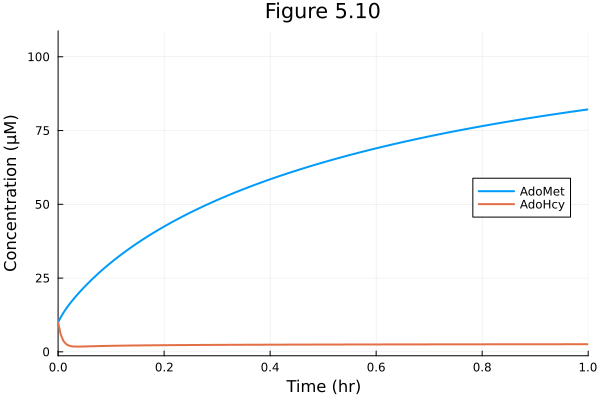

In [4]:
tend = 5.0
prob = ODEProblem(osys, [], tend, [])
sol = solve(prob)
plot(sol, title="Figure 5.10", xlabel="Time (hr)", ylabel="Concentration (μM)", xlims=(0, 1), legend=:right)

## Figure 5.11 A

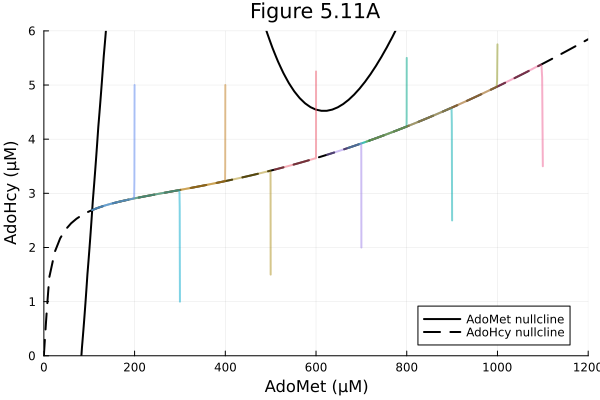

In [5]:
rx = range(0, 1200, 101)
ry = range(0, 6, 101)

∂A1 = (x, y) -> prob.f([x, y], prob.p, nothing)[1]
∂B1 = (x, y) -> prob.f([x, y], prob.p, nothing)[2]

fig = plot(title="Figure 5.11A")
contour!(fig, rx, ry, ∂A1, levels=[0], cbar=false, line=(:black))
plot!(fig, Float64[], Float64[], line=(:black), label="AdoMet nullcline")
contour!(fig, rx, ry, ∂B1, levels=[0], cbar=false, line=(:black, :dash))
plot!(fig, Float64[], Float64[], line=(:black, :dash), label="AdoHcy nullcline")

tend = 15.0
u0s = [
    [AdoMet => 500.0, AdoHcy => 1.5],
    [AdoMet => 900.0, AdoHcy => 2.5],
    [AdoMet => 1100.0, AdoHcy => 3.5],
    [AdoMet => 400.0, AdoHcy => 5.0],
    [AdoMet => 800.0, AdoHcy => 5.5],
    [AdoMet => 1000.0, AdoHcy => 5.75],
    [AdoMet => 300.0, AdoHcy => 1],
    [AdoMet => 700.0, AdoHcy => 2],
    [AdoMet => 200.0, AdoHcy => 5],
    [AdoMet => 600.0, AdoHcy => 5.25]
]

sols = map(u0s) do u0
    sol = solve(remake(prob, u0=u0, tspan=tend))
end

for sol in sols
    plot!(fig, sol, idxs=(AdoMet, AdoHcy), label=false, alpha=0.5)
end

plot!(fig, xlims=(0, 1200), ylims=(0, 6), xlabel="AdoMet (μM)", ylabel="AdoHcy (μM)", legend=:bottomright)

## Figure 5.11 B
Increase methionine level

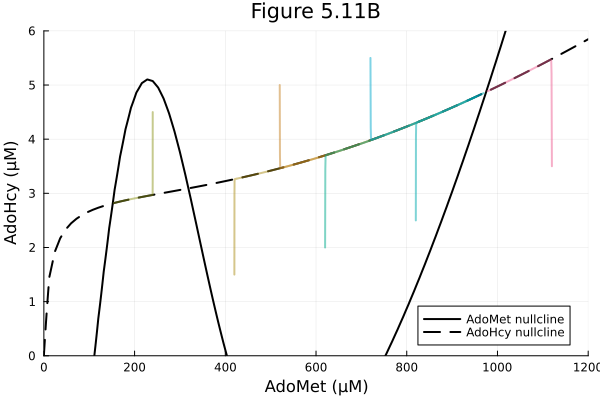

In [6]:
prob2 = remake(prob, p=[Met => 51])

rx = range(0, 1200, 101)
ry = range(0, 6, 101)

∂A2 = (x, y) -> prob2.f([x, y], prob2.p, nothing)[1]
∂B2 = (x, y) -> prob2.f([x, y], prob2.p, nothing)[2]

fig = plot(title="Figure 5.11B")
contour!(fig, rx, ry, ∂A2, levels=[0], cbar=false, line=(:black))
plot!(fig, Float64[], Float64[], line=(:black), label="AdoMet nullcline")
contour!(fig, rx, ry, ∂B2, levels=[0], cbar=false, line=(:black, :dash))
plot!(fig, Float64[], Float64[], line=(:black, :dash), label="AdoHcy nullcline")

tend = 15.0
u0s =[
    [AdoMet => 420, AdoHcy => 1.5],
    [AdoMet => 820, AdoHcy => 2.5],
    [AdoMet => 1120, AdoHcy => 3.5],
    [AdoMet => 520, AdoHcy => 5.0],
    [AdoMet => 620, AdoHcy => 2],
    [AdoMet => 240, AdoHcy => 4.5],
    [AdoMet => 720, AdoHcy => 5.5]
]

sols = map(u0s) do u0
    sol = solve(remake(prob2, u0=u0, tspan=tend))
end

for sol in sols
    plot!(fig, sol, idxs=(AdoMet, AdoHcy), label=false, alpha=0.5)
end

plot!(fig, xlims=(0, 1200), ylims=(0, 6), xlabel="AdoMet (μM)", ylabel="AdoHcy (μM)", legend=:bottomright)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*